In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('customer_booking.csv', encoding = 'ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

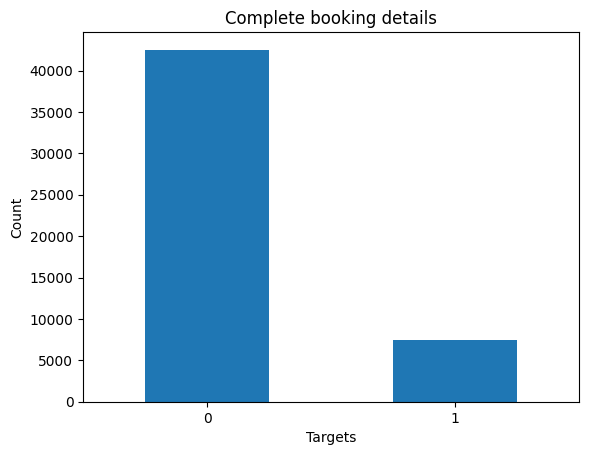

In [ ]:
booking_det = pd.value_counts(df['booking_complete'], sort = True)
booking_det.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Complete booking details")
plt.xlabel("Targets")
plt.ylabel("Count")
#booking_det.bar_label()
plt.show()

In [ ]:
is_weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] == 7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)

df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


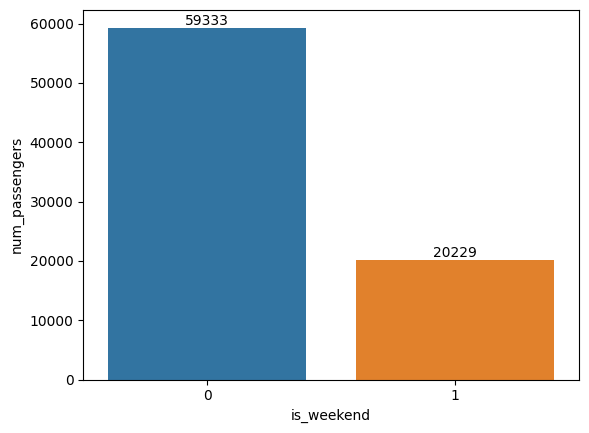

In [ ]:

weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(data = weekend, x= 'is_weekend', y= 'num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
X = df.drop('booking_complete', axis = 1)
y = df['booking_complete']

In [ ]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [ ]:
X.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
is_weekend                 int64
dtype: object

In [ ]:
for colnames in X.select_dtypes('object'):
  X[colnames], _ = X[colnames].factorize()

In [ ]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
is_weekend                 int64
dtype: object

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X,y)
mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = X.columns)
mi_scores = mi_scores.sort_values(ascending = False)

mi_scores

route                    0.052053
booking_origin           0.044906
flight_duration          0.017537
wants_extra_baggage      0.010547
wants_in_flight_meals    0.009259
length_of_stay           0.006493
wants_preferred_seat     0.004375
num_passengers           0.003570
is_weekend               0.001856
sales_channel            0.001697
trip_type                0.001584
flight_hour              0.000643
purchase_lead            0.000219
flight_day               0.000000
Name: MI Scores, dtype: float64

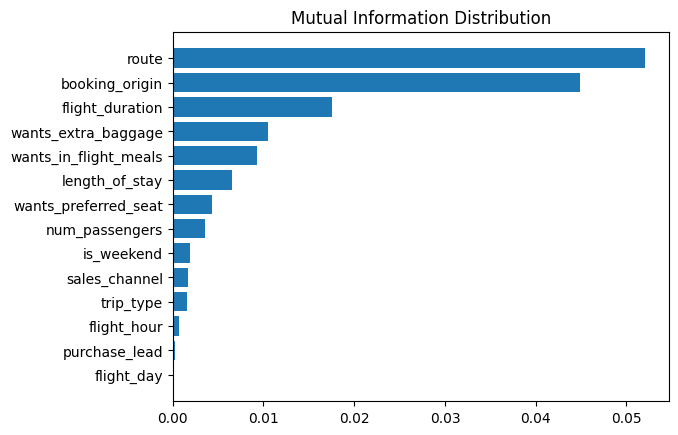

<Figure size 700x300 with 0 Axes>

In [ ]:
def plt_mutual_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width,scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Information Distribution')
  plt.figure(dpi=100, figsize=(7,3))
  
plt_mutual_scores(mi_scores)

In [7]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef


X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= (X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

model = RandomForestClassifier(max_depth=70, min_samples_leaf=3, min_samples_split=19, n_estimators=500, random_state=42)
model.fit(X_train, y_train)
preds= model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))
#print('MCC score: ',matthews_corrcoef(y_val, preds))

ACCURACY:  84.87
AUC score:  0.5


In [6]:
# Import needed packages
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
print(classification_report(y_val,preds))

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=500, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_scores

array([0.8505    , 0.853     , 0.85116667, 0.85216667, 0.84883333])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.8511333333333333

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=500, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)
cv_scores

array([0.84966667, 0.85133333, 0.85266667, 0.85733333, 0.85166667,
       0.852     , 0.85266667, 0.851     , 0.849     , 0.85366667])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.8521000000000001

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='poly', C=0.1, gamma = 0.1).fit(X_train, y_train)
result = classifier.predict(X_test)
Score = metrics.accuracy_score(y_test, result)
print(Score)

np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay(classifier, X_test, y_test, cmap=plt.cm.Blues)
title = "Confusion_Matrix"
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')

In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_test = matthews_corrcoef(y_test, result)
mcc_test

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

In [10]:
from xgboost import XGBClassifier

X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= (X)
y= df.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.96000000000001
AUC score:  0.5431644571912829


In [13]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= (X)
y= df.booking_complete       

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

xgb_model = XGBClassifier()
xgb_model.fit(train_full_X, train_full_y)
prediction_xgb = xgb_model.predict(test_X)
#forest_model= RandomForestClassifier(random_state=1)
#forest_model.fit(train_full_X, train_full_y)
#preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,prediction_xgb)*100)
print('AUC score: ',roc_auc_score(test_y,prediction_xgb))

ACCURACY:  85.19
AUC score:  0.5404461362352639


<Axes: >

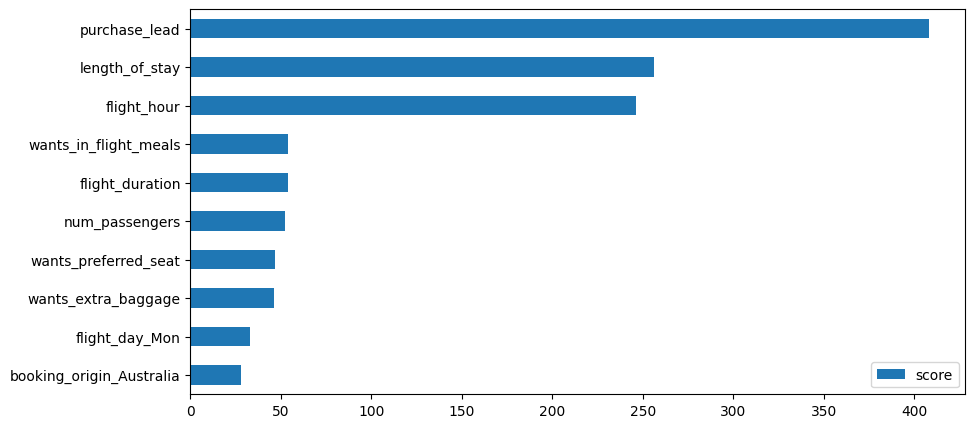

In [15]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(10, columns="score").sort_values(by = "score", ascending=True).plot(kind='barh', figsize = (10,5)) ## plot top 10 features